# **1. Import Library**

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# **2. Load Dataset**

In [3]:
df = pd.read_csv('D:/one drive UA/OneDrive - Universitas Airlangga/SEMESTER 6/ASB/demo/final.csv')
df

,mean,std,var,rms,skewness,kurtosis,delta,theta,alpha,beta,...,rms_FC6,skewness_FC6,kurtosis_FC6,entropy_FC6,delta_FC6,theta_FC6,alpha_FC6,beta_FC6,gamma_FC6,outcome
0,1526.994216,6.334173,40.121743,1527.007353,1.532286,6.735099,0.000005,2.700000e-07,0.000013,0.010343,...,1694.527310,-0.133614,0.268617,0.789,0.000021,1.510000e-06,0.000118,0.060236,2.185175,0
1,1522.273291,13.901473,193.250963,1522.336764,-3.194118,16.434917,0.000013,8.120000e-07,0.000034,0.017279,...,1694.188665,-1.007230,3.254657,0.708,0.000018,2.520000e-06,0.000111,0.064383,1.610859,0
2,1525.568576,6.765647,45.773985,1525.583578,0.213206,0.796216,0.000011,3.240000e-07,0.000020,0.012457,...,1695.329671,0.314247,1.788882,0.746,0.000048,3.390000e-06,0.000213,0.123379,2.460791,0
3,1526.060395,5.801412,33.656377,1526.071422,-0.000402,0.279051,0.000003,2.500000e-07,0.000017,0.010295,...,1704.352349,0.074694,1.250499,0.786,0.000022,3.240000e-06,0.000150,0.080488,2.193976,0
4,1542.765978,82.549309,6814.388335,1544.972897,3.342907,11.552855,0.000006,1.150000e-05,0.000554,0.113709,...,1696.859205,-1.156660,13.846079,0.531,0.000116,5.600000e-05,0.002771,0.719350,5.662841,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1522.890741,40.977236,1679.133883,1523.441939,0.145769,0.456968,0.000014,5.980000e-06,0.000128,0.044810,...,1708.035715,0.057102,0.405665,0.607,0.000019,7.110000e-07,0.000063,0.052196,2.247720,1
140,1533.529120,44.528075,1982.749422,1534.175450,0.906501,2.665693,0.000018,7.330000e-06,0.000258,0.061736,...,1715.976015,0.336446,0.296911,0.648,0.000018,1.340000e-06,0.000067,0.050808,2.770498,1
141,1522.045439,63.738637,4062.613802,1523.379444,0.442848,1.503617,0.000028,1.500000e-05,0.000621,0.123020,...,1712.483259,-0.054101,0.298151,0.665,0.000029,1.470000e-06,0.000080,0.057809,6.391817,1
142,1531.391667,91.123964,8303.576888,1534.100392,0.025437,0.483279,0.000025,3.860000e-05,0.001814,0.425903,...,1711.449147,0.081828,0.217014,0.657,0.000011,1.780000e-06,0.000088,0.061767,1.328424,1


# **3. Preprocessing**

In [4]:
df['outcome'].value_counts()

1    74
0    70
Name: outcome, dtype: int64

<AxesSubplot:xlabel='outcome', ylabel='count'>

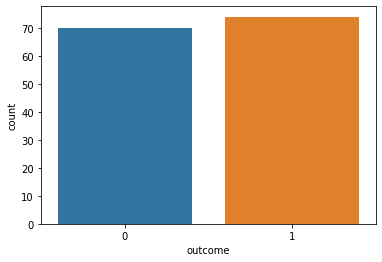

In [5]:
sns.countplot(x='outcome',data=df)

In [6]:
#handling imbalance
df_outcome = df['outcome']
df_majority = df[(df_outcome == 1)]
df_minority = df[(df_outcome == 0)]

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                replace = True,
                                n_samples = 74,
                                random_state = 1)
df = pd.concat([df_minority_upsampled, df_majority])

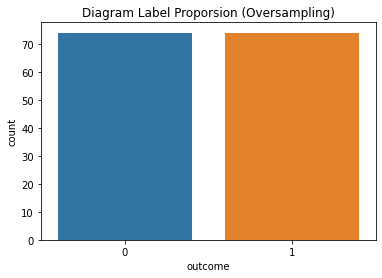

In [7]:

sns.countplot(x='outcome', data=df)
plt.title('Diagram Label Proporsion (Oversampling)')
plt.show() 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 37 to 143
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mean          148 non-null    float64
 1   std           148 non-null    float64
 2   var           148 non-null    float64
 3   rms           148 non-null    float64
 4   skewness      148 non-null    float64
 5   kurtosis      148 non-null    float64
 6   delta         148 non-null    float64
 7   theta         148 non-null    float64
 8   alpha         148 non-null    float64
 9   beta          148 non-null    float64
 10  gamma         148 non-null    float64
 11  entropy       148 non-null    float64
 12  mean_P7       148 non-null    float64
 13  std_P7        148 non-null    float64
 14  var_p7        148 non-null    float64
 15  rms_P7        148 non-null    float64
 16  skewness_P7   148 non-null    float64
 17  kurtosis_P7   148 non-null    float64
 18  delta_P7      148 non-null   

In [9]:
# Find correlations with the target and sort
correlations = df.corr()['outcome'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(25))
print('\nMost Negative Correlations:\n', correlations.head(25))

Most Positive Correlations:
 alpha_P7        0.096504
beta_P7         0.098961
kurtosis        0.099673
skewness        0.104436
theta_FC6       0.133023
gamma_P7        0.139923
var_p7          0.146555
alpha_FC6       0.146860
var_FC6         0.148076
beta_FC6        0.158540
std_FC6         0.158955
kurtosis_P7     0.163834
delta_FC6       0.172776
kurtosis_FC6    0.180637
delta_P7        0.183608
gamma_FC6       0.195033
std_P7          0.196082
delta           0.217912
beta            0.226917
alpha           0.227726
var             0.232440
theta           0.235760
gamma           0.239361
std             0.246039
outcome         1.000000
Name: outcome, dtype: float64

Most Negative Correlations:
 entropy_P7     -0.264032
entropy        -0.189789
entropy_FC6    -0.109253
mean           -0.088477
mean_FC6       -0.074048
rms_FC6        -0.058758
rms            -0.053161
mean_P7        -0.029063
rms_P7         -0.005383
skewness_P7     0.047492
skewness_FC6    0.093425
theta_P7   

In [10]:
# Define the columns to drop
columns_to_drop = ['rms','kurtosis','skewness','mean','skewness_P7','rms_P7','mean_P7','kurtosis_P7','rms_FC6','kurtosis_FC6','skewness_FC6','mean_FC6']

# Drop the specified columns
df1 = df.drop(columns=columns_to_drop)
df1

,std,var,delta,theta,alpha,beta,gamma,entropy,std_P7,var_p7,...,entropy_P7,std_FC6,var_FC6,entropy_FC6,delta_FC6,theta_FC6,alpha_FC6,beta_FC6,gamma_FC6,outcome
37,133.081660,17710.728220,0.000004,5.350000e-05,0.002305,0.467486,5.671924,0.450,66.936701,4480.521927,...,0.431,120.735071,14576.957310,0.503,0.000017,4.560000e-05,0.001949,0.508163,7.134264,0
12,9.063264,82.142757,0.000001,6.660000e-07,0.000025,0.013290,0.405396,0.662,7.277643,52.964089,...,0.741,20.956946,439.193600,0.668,0.000013,2.730000e-06,0.000197,0.072984,2.203462,0
9,8.307410,69.013065,0.000004,4.360000e-07,0.000029,0.015790,0.490199,0.723,7.872753,61.980244,...,0.755,17.690363,312.948937,0.715,0.000007,2.780000e-06,0.000163,0.083481,2.633372,0
5,14.936295,223.092912,0.000007,1.220000e-06,0.000060,0.030280,0.585832,0.660,10.652792,113.481982,...,0.680,56.743712,3219.848844,0.534,0.000082,2.110000e-05,0.000730,0.288922,3.860321,0
64,36.411200,1325.775503,0.000009,1.590000e-06,0.000081,0.028637,0.783694,0.522,17.931004,321.520908,...,0.558,15.764157,248.508650,0.701,0.000018,6.690000e-07,0.000067,0.035770,0.915777,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,40.977236,1679.133883,0.000014,5.980000e-06,0.000128,0.044810,2.783008,0.430,20.258785,410.418381,...,0.505,19.220064,369.410860,0.607,0.000019,7.110000e-07,0.000063,0.052196,2.247720,1
140,44.528075,1982.749422,0.000018,7.330000e-06,0.000258,0.061736,3.466623,0.479,22.368742,500.360630,...,0.475,21.510768,462.713130,0.648,0.000018,1.340000e-06,0.000067,0.050808,2.770498,1
141,63.738637,4062.613802,0.000028,1.500000e-05,0.000621,0.123020,3.717860,0.427,22.674557,514.135533,...,0.555,19.968265,398.731596,0.665,0.000029,1.470000e-06,0.000080,0.057809,6.391817,1
142,91.123964,8303.576888,0.000025,3.860000e-05,0.001814,0.425903,4.262004,0.475,17.478712,305.505377,...,0.533,16.539950,273.569940,0.657,0.000011,1.780000e-06,0.000088,0.061767,1.328424,1


# **4. Splitting Data**

In [11]:
X = df1.loc[:, df1.columns != 'outcome']
y = df1['outcome']

In [12]:
# X = df.loc[:, df.columns != 'outcome']
# y = df['outcome']

In [13]:
# splitting X and y into training and testing sets (pake proporsi 70 30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(45, 24)
(103, 24)
(103,)
(45,)


# **5. Modeling**

## **5.1. Decision Tree**

In [26]:
# using decision tree
dt = DecisionTreeClassifier(random_state =25)
dt = dt.fit(X_train, y_train)

y_dt_test = dt.predict(X_test)
y_dt_train=dt.predict(X_train)
y_dt_proba= dt.predict_proba(X_test)


### **5.1.1 Evaluation of Decision Tree**

In [27]:
print(classification_report(y_test, y_dt_test))
print(confusion_matrix(y_test, y_dt_test))

print (classification_report(y_train,y_dt_train))
print(confusion_matrix(y_train, y_dt_train))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.71      0.81      0.76        21

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45

[[17  7]
 [ 4 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        53

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103

[[50  0]
 [ 0 53]]


In [15]:
accuracy = accuracy_score(y_test, y_dt_test)
print("Accuracy:", accuracy)

Accuracy: 0.7555555555555555


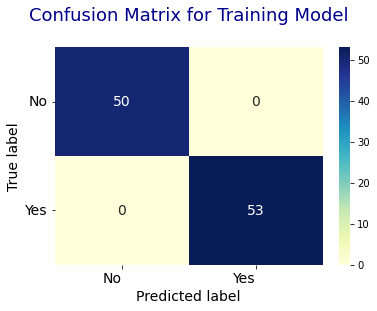

In [16]:

confusion_matrix_app = pd.DataFrame((confusion_matrix(y_train, y_dt_train)), ('No', 'Yes'), ('No', 'Yes'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_app, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

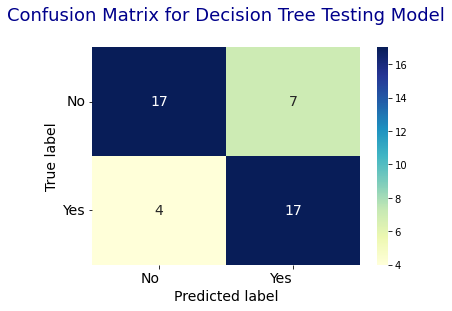

In [17]:
confusion_matrix_app = pd.DataFrame((confusion_matrix(y_test, y_dt_test)), ('No', 'Yes'), ('No', 'Yes'))
# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_app, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Decision Tree Testing Model\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

## **5.2. Random Forest**

In [28]:
# random forest
rf = RandomForestClassifier(random_state= 38,
                            n_estimators =30,
                            max_depth = None,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            oob_score = True)
rf = rf.fit(X_train, y_train)
y_rf_test = rf.predict(X_test)
y_rf_proba= rf.predict_proba(X_test)
y_rf_train = rf.predict(X_train)



### **5.2.1 Evaluation of Random Forest**

In [29]:
print(classification_report(y_test, y_rf_test))
print(confusion_matrix(y_test, y_rf_test))

print(classification_report(y_train, y_rf_train))
print(confusion_matrix(y_train, y_rf_train))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.78      0.86      0.82        21

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45

[[19  5]
 [ 3 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        53

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103

[[50  0]
 [ 0 53]]


In [19]:
accuracy = accuracy_score(y_test, y_rf_test)
print("Accuracy:", accuracy)

Accuracy: 0.8222222222222222


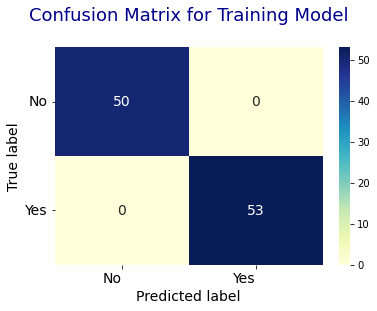

In [20]:
confusion_matrix_app = pd.DataFrame((confusion_matrix(y_train, y_rf_train)), ('No', 'Yes'), ('No', 'Yes'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_app, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

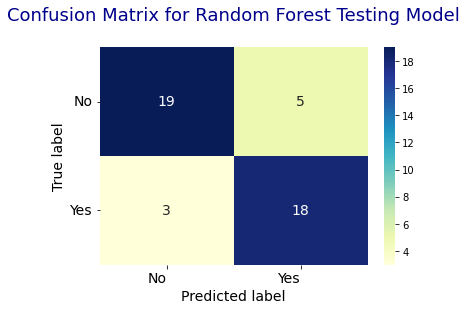

In [21]:
confusion_matrix_app = pd.DataFrame((confusion_matrix(y_test, y_rf_test)), ('No', 'Yes'), ('No', 'Yes'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_app, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Random Forest Testing Model\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

## **5.3. XGBoost**

In [30]:
# Initialize XGBClassifier
model = XGBClassifier(
    max_depth=20, 
    min_child_weight =0.5,
    eta =0.4,
    scale_pos_weight=1,
    subsample=0.9,
    colsample_bytree=0.4,
    seed=54
)
# max-depth,min_child_weight,eta,scale_pos_weight

# Train XGBClassifier model
model.fit(X_train, y_train)

# Predict on test data
y_xg_test = model.predict(X_test)
y_xg_train = model.predict(X_train)
y_xg_proba = model.predict_proba(X_test)


### **5.3.1 Evaluation of XGBoost**

In [31]:
print(classification_report(y_test, y_xg_test))
print(confusion_matrix(y_test, y_xg_test))

print(classification_report(y_train, y_xg_train))
print(confusion_matrix(y_train, y_xg_train))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86        24
           1       0.80      0.95      0.87        21

    accuracy                           0.87        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.88      0.87      0.87        45

[[19  5]
 [ 1 20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        53

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103

[[50  0]
 [ 0 53]]


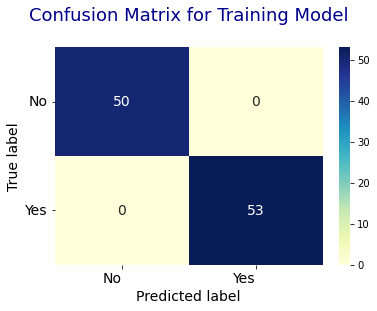

In [23]:
confusion_matrix_app = pd.DataFrame((confusion_matrix(y_train, y_xg_train)), ('No', 'Yes'), ('No', 'Yes'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_app, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

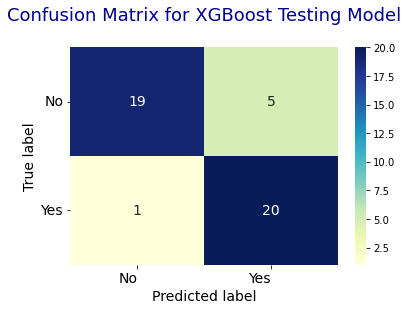

In [24]:
confusion_matrix_app = pd.DataFrame((confusion_matrix(y_test, y_xg_test)), ('No', 'Yes'), ('No', 'Yes'))
# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_app, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for XGBoost Testing Model\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

## **5.4 ROC Curve**

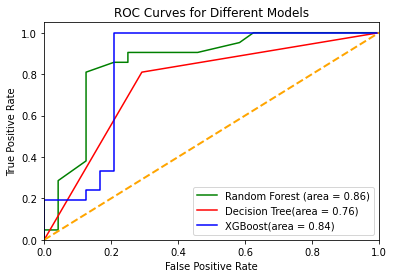

In [25]:
# Get predicted probabilities for each model
y_rf_proba = rf.predict_proba(X_test)[:, 1]
y_dt_proba = dt.predict_proba(X_test)[:, 1]
y_xg_proba = model.predict_proba(X_test)[:, 1]
# y_rf_auto_proba = rf_auto.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC score for each model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf_proba)
roc_auc_rf = roc_auc_score(y_test, y_rf_proba)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_dt_proba)
roc_auc_dt = roc_auc_score(y_test, y_dt_proba)

fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, y_xg_proba)
roc_auc_xg = roc_auc_score(y_test, y_xg_proba)

# fpr_rf_auto, tpr_rf_auto, thresholds_rf_auto = roc_curve(y_test, y_rf_auto_proba)
# roc_auc_rf_auto = roc_auc_score(y_test, y_rf_auto_proba)

# Plot the ROC curves
plt.plot(fpr_rf, tpr_rf, color='green', label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='red', label='Decision Tree(area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_xg, tpr_xg, color='blue', label='XGBoost(area = %0.2f)' % roc_auc_xg)
# plt.plot(fpr_rf_auto, tpr_rf_auto, color='purple', label='Random Forest Auto(area = %0.2f)' % roc_auc_rf_auto)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()
